# Shivesh Upadhyay

## Looking at data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'terror.csv',encoding='latin1')
dataset.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,1.970010e+11,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [3]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [4]:
dataset.nunique()

eventid         576
iyear            47
imonth           13
iday             32
approxdate     2244
              ...  
INT_LOG           3
INT_IDEO          3
INT_MISC          3
INT_ANY           3
related       14306
Length: 135, dtype: int64

### There are too many columns and too many unique values for each column, but by looking at CSV file we get to know that columns : - ('region_txt' , 'country_txt', 'provstate' and 'city') are used for location. So in following we will look the number of terror attacks according to these locations. We will start with column with more specific location but less number of  unique values.

In [11]:
dataset['region_txt'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

#### We see region_txt has less unique value but it is too less in number that is a very broader category so we move to country_txt

In [5]:
dataset["country_txt"].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

#### From above we  see country_txt has fairly large unique values but is  still can be handled in analysis easily  and it is also more specific location than region_txt. So we will look for null values and start our analysis from here only.

In [25]:
dataset["country_txt"].isnull().sum()

0

#### No missing value so green signal to moove ahead

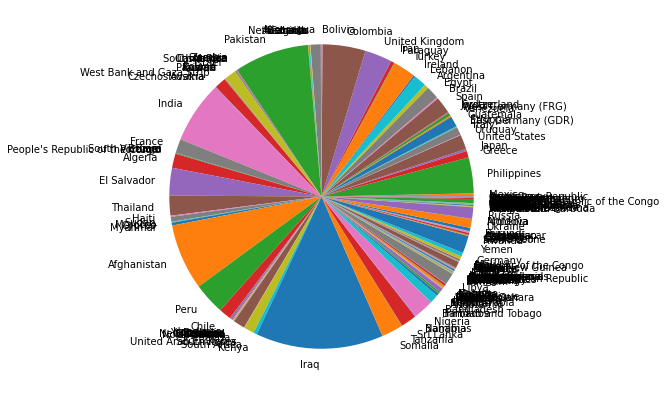

In [26]:
country = dataset["country_txt"].unique()
count = [] 
for i in country:
    count.append(len(dataset[dataset['country_txt'] == i]))
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = country)
plt.show()

### From above pie-chart it is evident that  'Iraq' has most terror cases followed by 'Pakistan' and 'India'. But for surity we can check  by code below

In [27]:
max = 0;
cx = "" 
for i in country:
    if (len(dataset[dataset['country_txt'] == i]) > max):
        max = len(dataset[dataset['country_txt'] == i])
        cx = i
print(cx, max)

Iraq 24636


### Now we will look for provstate inside iraq and then city inside most affected provstate

In [28]:
d1 = dataset[dataset['country_txt'] == 'Iraq']

In [29]:
d1['region_txt'].unique()

array(['Middle East & North Africa'], dtype=object)

In [30]:
d1['provstate'].unique()

array(['Nineveh', 'Baghdad', 'Unknown', 'Basra', 'At Tamim',
       'Sulaymaniyah', 'Kirkuk', 'Dihok', 'Saladin', 'Arbil', 'Diyala',
       'Maysan', 'Dhi Qar', 'Al Anbar', 'Muthanna', 'Karbala', 'Wasit',
       'Najaf', 'Babil', 'Qadisiyah', 'Kunar', 'Khost', 'Al Qadisiyah',
       'NIneveh', 'unknown'], dtype=object)

In [31]:
d1['provstate'].isnull().sum()

0

In [32]:
x1 = d1['provstate'].unique()
for i in x1:
    print(i , len(d1[d1['provstate'] == i]))

Nineveh 3241
Baghdad 7644
Unknown 148
Basra 266
At Tamim 125
Sulaymaniyah 60
Kirkuk 1669
Dihok 29
Saladin 3411
Arbil 99
Diyala 3041
Maysan 31
Dhi Qar 66
Al Anbar 3299
Muthanna 20
Karbala 142
Wasit 121
Najaf 53
Babil 1110
Qadisiyah 27
Kunar 1
Khost 1
Al Qadisiyah 30
NIneveh 1
unknown 1


In [33]:
d2 = d1[d1['provstate'] == 'Baghdad']
x2 = d2['city'].unique()

In [34]:
d2['city'].isnull().sum()

0

In [35]:
for i in x2:
    print(i , len(d1[d1['city'] == i]))

Baghdad 7585
Arab Jabour 1
Unknown 562
Hawr Rajab 44
Hay Abu-Dashir 1
Tariq 1
Tajiyat 3
Akarkouf 4
Baghdad district 1
Albu Khalid 1
Thalibah 2


## So 'Baghdad' is most terror affected city in world. It may possible if any city in pakistan also has more terror cases. So for surity we will look for it also.

In [36]:
d3 = dataset[dataset['country_txt'] == 'Pakistan']

In [37]:
d3['region_txt'].unique()

array(['South Asia'], dtype=object)

In [38]:
d3['provstate'].unique()

array(['Sindh', 'North-West Frontier Province', 'Punjab',
       'Islamabad Capital Territory',
       'Federally Administered Tribal Areas', 'Unknown', 'Balochistan',
       'Khyber Pakhtunkhwa', 'Azad Kashmir', 'Gilgit-Baltistan', 'SIndh'],
      dtype=object)

In [39]:
x3 = d3['provstate'].unique()
for i in x3:
    print(i , len(d3[d3['provstate'] == i]))

Sindh 3206
North-West Frontier Province 866
Punjab 829
Islamabad Capital Territory 154
Federally Administered Tribal Areas 2392
Unknown 49
Balochistan 3710
Khyber Pakhtunkhwa 3084
Azad Kashmir 30
Gilgit-Baltistan 47
SIndh 1


## We can see that not even any provstate in pakistan has cases as much as in Baghdad city.      So 'BAGHDAD' city is most terror affected region in world in my analysis